In [26]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [8]:
# mount google drive for load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = []
class_labels = ['Real','Fake']
IMAGE_SIZE = 64
folder ='/content/drive/MyDrive/Colab Notebooks/Group_Project_Data/Train/'
for label in class_labels:
    path = os.path.join(folder, label)
    class_num = class_labels.index(label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
        train_data.append([new_array, class_num])
shuffle(train_data)

In [ ]:
test_data = []
class_labels = ['Real','Fake']
IMAGE_SIZE = 64
folder ='/content/drive/MyDrive/Colab Notebooks/Group_Project_Data/Valid/'
for label in class_labels:
    path = os.path.join(folder, label)
    class_num = class_labels.index(label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
        test_data.append([new_array, class_num])
shuffle(test_data)

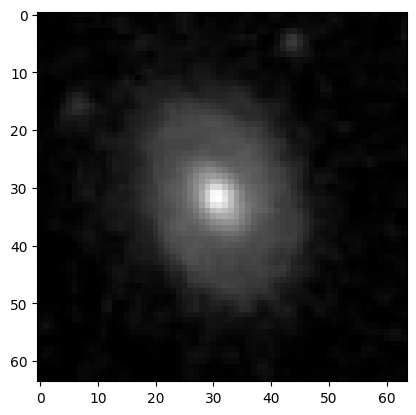

In [11]:
X_train =[]
y_train =[]
for features, label in train_data:
    X_train.append(features)
    y_train.append(label)
X_train = ny.array(X_train).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_train = X_train.astype('float32')
X_train /= 256
y_train=np_utils.to_categorical(y_train,2)
plt.imshow(X_train[10],cmap='gray')

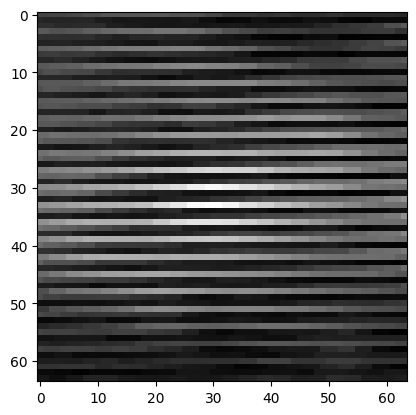

In [27]:
X_test =[]
y_test =[]
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array([item[0] for item in test_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
y_test = np.array([item[1] for item in test_data])

X_test = X_test.astype('float32')
X_test /= 255

plt.imshow(X_test[10],cmap='gray')

In [13]:
batch_size = 16
classes =2
epochs = 30
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
])

In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", cnn_score[0]*100)
print("Test accuracy: ", cnn_score[1]*100)

In [30]:
cnn_model.save("CNNmodel.h5")

In [31]:
prediction = cnn_model.predict(X_test)

69/69 [==============================] - 4s 54ms/step


In [32]:
prediction = ny.argmax(prediction,axis=-1)
class_labels = ny.argmax(y_test,axis=-1)
class_labels

0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(class_labels,prediction))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(class_labels,prediction)
sb.heatmap(conf_matrix,annot=True,fmt='g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

1/1 [==============================] - 0s 23ms/step


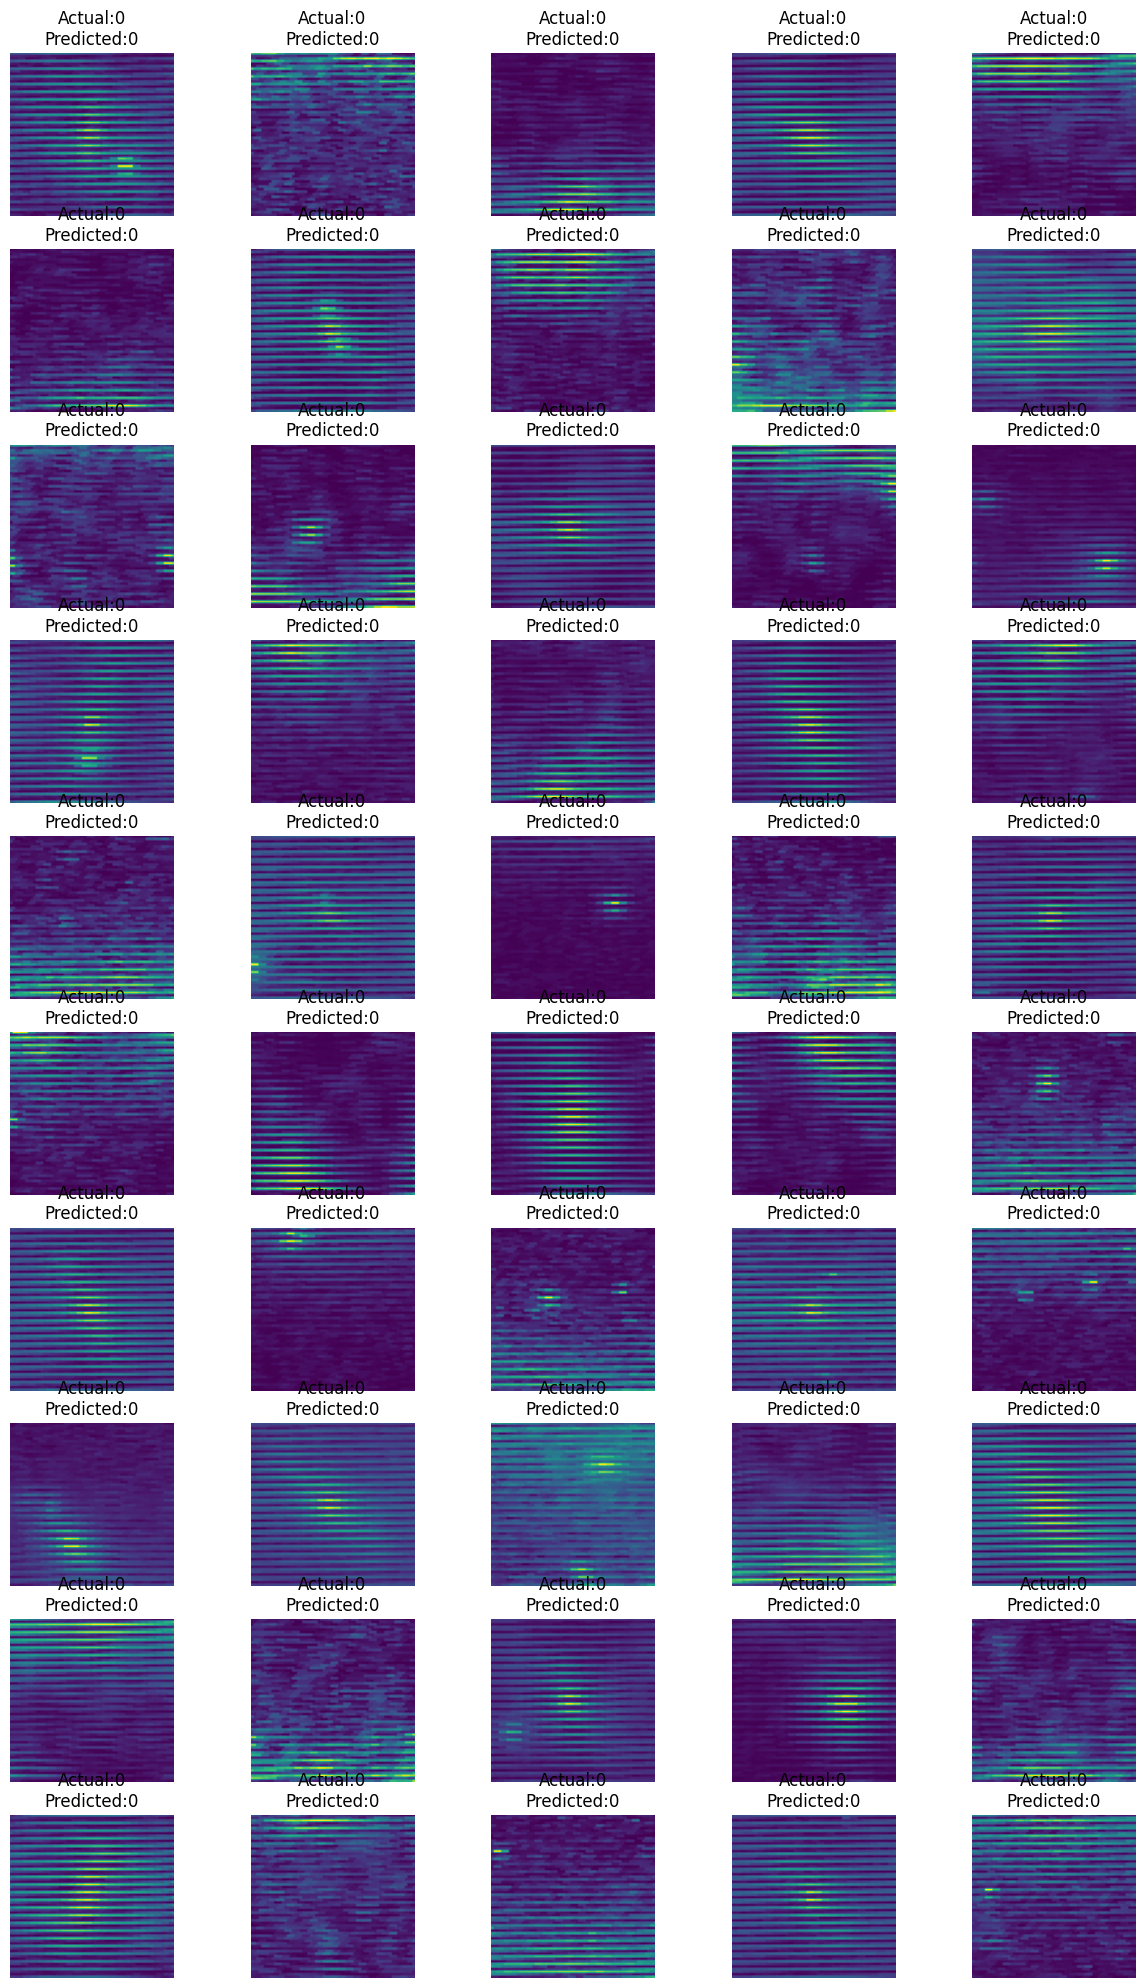

In [35]:
plt.figure(figsize=(15,25))
for i in range(1,51):
    plt.subplot(10,5,i)
    plt.imshow(X_test[i].reshape(64,64))
    predicted_label = cnn_model.predict(X_test[i].reshape(1,64,64,1),batch_size=1)
    plt.title('Actual:{:.0f}\nPredicted:{:.0f}'.format(y_test[i].argmax(),predicted_label.argmax()))
    plt.axis("off")
plt.show()